<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S3_3_1R%C3%A9gressions_R%C3%A9gularis%C3%A9e_LASSO_Exercice_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Régression Régularisées : LASSO

0. Importez les librairies usuelles 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Chargez les données grâce à la commande suivante :

```
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
```

2. Créer un dataframe contenant les variables explicatives et un contenant uniquement la variable cible (target)

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
y = pd.DataFrame(cancer.target, columns=["cancer"])
y.head()

,cancer
0,0
1,0
2,0
3,0
4,0


3. Séparer les données en une base d’apprentissage et une base de test

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_df, y, test_size = 0.3)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_fit = sc.fit(X_train)
X_train = sc_fit.transform(X_train)
X_test = sc_fit.transform(X_test)

4. Générez un modèle de régression linéaire, un modèle lasso ou alpha vaut 1, un autre ou alpha = 0.01 et un dernier où alpha = 0.0001

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
lin = LinearRegression()
lasso1 = Lasso(alpha = 1)
lasso2 = Lasso(alpha = 0.01)
lasso3 = Lasso(alpha = 0.0001)

5. Entraînez ces modèles

In [0]:
lin.fit(X_train, y_train)
lasso1.fit(X_train, y_train)
lasso2.fit(X_train, y_train)
lasso3.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7819088354461652, tolerance: 0.009394974874371867
  positive)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

6. Produisez les scores de performance des quatres modèles

In [0]:
print("Score Lin : {} \n Score Lasso1 : {} \n Score Lasso2 : {} \n Score Lasso3 : {}".format(lin.score(X_test, y_test),
                                                                                            lasso1.score(X_test, y_test),
                                                                                            lasso2.score(X_test, y_test),
                                                                                            lasso3.score(X_test,y_test)))

Score Lin : 0.7352700249879249 
 Score Lasso1 : -0.004228121457484191 
 Score Lasso2 : 0.7305487099101083 
 Score Lasso3 : 0.7372128449808293


7. Comparez les coefficients des quatres modèles, quelles sont vos conclusions ?

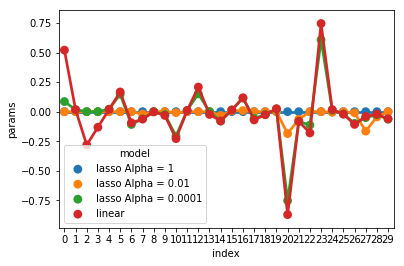

In [0]:
perf_lasso1 = pd.DataFrame({"params": lasso1.coef_, 
                                       "model": "lasso Alpha = 1", 
                                       "index": range(0, len(cancer_df.columns))})

perf_lasso2 = pd.DataFrame({"params": lasso2.coef_, 
                                       "model": "lasso Alpha = 0.01", 
                                       "index": range(0, len(cancer_df.columns))})

perf_lasso3 = pd.DataFrame({"params": lasso3.coef_, 
                                       "model": "lasso Alpha = 0.0001", 
                                       "index": range(0, len(cancer_df.columns))})


perf_lin = pd.DataFrame({"params": lin.coef_[0], 
                                       "model": "linear", 
                                       "index": range(0, len(cancer_df.columns))})

perf_compar = pd.concat([perf_lasso1,perf_lasso2,perf_lasso3,perf_lin])

import seaborn as s
s.pointplot(x = 'index',y = 'params',hue = 'model', style = 'model', data = perf_compar)

In [0]:
lasso3.coef_

array([ 0.08566388,  0.01691022,  0.        , -0.        ,  0.02147825,
        0.14745751, -0.10873791, -0.06042758,  0.        , -0.024685  ,
       -0.20685745,  0.01076621,  0.1514605 ,  0.        , -0.07957279,
        0.01473409,  0.11441824, -0.05814338, -0.0239003 ,  0.02362594,
       -0.75344094, -0.08302939, -0.11339706,  0.60847003,  0.01260094,
       -0.01918316, -0.09939265, -0.05073797, -0.02543159, -0.06404975])

In [0]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [10**(-a) for a in range(10)]}
lasso = Lasso()
grid = GridSearchCV(lasso,param_grid=params, cv = 10)

grid.fit(X_train,y_train)

In [0]:
grid.best_params_

{'alpha': 0.001}

In [0]:
grid.best_estimator_.coef_

array([-0.        ,  0.        , -0.        ,  0.01726497,  0.01689752,
        0.10331056, -0.06985885, -0.04800112,  0.00080563,  0.        ,
       -0.14984023,  0.00308128,  0.04410434,  0.05549   , -0.07071806,
        0.0191697 ,  0.09366549, -0.03636462, -0.01206213,  0.01144504,
       -0.60642538, -0.06322883, -0.        ,  0.41631465,  0.        ,
       -0.        , -0.10131497, -0.08028819, -0.03816176, -0.06229977])